In [132]:
#import libraries
import pandas as pd

Cleaning Data

In [133]:
#create indicator ID DataFrame
indicator_df= pd.read_csv('Original CSV/Zillow Indicators.csv')

#Display sample data
indicator_df.head()

,indicator_id,indicator,category
0,MRAM,"Mean Days to Pending (Raw, All Homes, Monthly)",Inventory and sales
1,SSSW,"Median Sale Price (Smooth, SFR only, Weekly View)",Inventory and sales
2,LSSM,"Median List Price (Smooth, SFR Only, Monthly)",Inventory and sales
3,CSAW,"Share of Listings With a Price Cut (Smooth, Al...",Inventory and sales
4,ISSM,"For-Sale Inventory (Smooth, SFR only, Monthly)",Inventory and sales


In [134]:
indicator_df.count()

indicator_id    56
indicator       56
category        56
dtype: int64

In [135]:
#Regions DataFrame
regions_df= pd.read_csv('Original CSV/Zillow Regions.csv')

#Display Sample Data
regions_df.head()

,region_id,region_type,region
0,1286,county,Orange County;CA;Los Angeles-Long Beach-Anahei...
1,3175,county,Philadelphia County;PA;Philadelphia-Camden-Wil...
2,3017,county,Sacramento County;CA;Sacramento-Roseville-Fols...
3,401,county,"Bronx County;NY;New York-Newark-Jersey City, N..."
4,3165,county,Hillsborough County;FL;Tampa-St. Petersburg-Cl...


In [136]:
regions_df.count()

region_id      89305
region_type    89305
region         89305
dtype: int64

In [137]:
region_types= regions_df['region_type'].unique()
region_types

array(['county', 'metro', 'state', 'neigh', 'city', 'zip'], dtype=object)

In [138]:
#Data DataFrame
data_df= pd.read_csv('Original CSV/Zillow Data.csv')

#Display Data
data_df.head()

,indicator_id,region_id,date,value
0,Z4BR,403211,2/28/2021,477466.00
1,ZALL,26591,11/30/2005,76985.30
2,ZALL,3986,11/30/2005,176636.58
3,ZALL,6626,11/30/2005,161867.52
4,ZALL,49285,11/30/2005,191388.10


In [139]:
print(data_df.count())
print(data_df['indicator_id'].nunique())
print(data_df['region_id'].nunique())

indicator_id    1048575
region_id       1048575
date            1048575
value           1048575
dtype: int64
28
27878


In [140]:
# Merge to complete a lookup of valid indicators_ID's
valid_indicators = pd.merge(data_df[['indicator_id']],indicator_df, on='indicator_id', how='inner')
print(valid_indicators['indicator_id'].nunique())
print(valid_indicators['indicator_id'].unique())
print(valid_indicators.count())

28
['Z4BR' 'ZALL' 'ZCON' 'ZSFH' 'Z3BR' 'IRAW' 'SAAW' 'MRAM' 'Z2BR' 'ZATT'
 'SSSW' 'LSSM' 'CSAW' 'ZABT' 'SASW' 'MRAW' 'LRAM' 'ISSW' 'MSAW' 'LSAM'
 'NRAW' 'NSAW' 'SRAM' 'SSAM' 'NSAM' 'CRAM' 'Z5BR' 'NRAM']
indicator_id    1048575
indicator       1048575
category        1048575
dtype: int64


In [141]:
#Merge to complete a lookup of valid region_ID's
valid_region= pd.merge(data_df['region_id'], regions_df, on= "region_id", how= 'inner')
print(valid_region['region_id'].nunique())
print(valid_region['region_id'].unique())
print(valid_region.count())

27878
[403211  26591   3986 ...  77520  90736  66116]
region_id      1048575
region_type    1048575
region         1048575
dtype: int64


In [142]:
#Triple merge to complete a lookup of valid data
valid_data= pd.merge(data_df, indicator_df[['indicator_id']], on='indicator_id', how='inner')
Clean_data= pd.merge(valid_data, regions_df[['region_id']], on='region_id', how='inner')
print(Clean_data['indicator_id'].nunique())
print(Clean_data['region_id'].nunique())

28
27878


In [143]:
#creating the clean CSV files for indicator and regions
#valid_indicators.head()
#Drop the duplicates (This list should only have 1 Id each indicators)
valid_indicators= valid_indicators.drop_duplicates(subset=['indicator_id'])
print(valid_indicators.count())

indicator_id    28
indicator       28
category        28
dtype: int64


In [144]:
#valid_region.head()
#Drop the duplicates (This list should only have 1 Id each indicators)
valid_region=valid_region.drop_duplicates(subset=['region_id'])
print(valid_region.count())

region_id      27878
region_type    27878
region         27878
dtype: int64


In [145]:
Clean_data.head()

,indicator_id,region_id,date,value
0,Z4BR,403211,2/28/2021,477466.00
1,Z4BR,271495,2/28/2021,1119735.00
2,Z4BR,343208,2/28/2021,646941.00
3,Z4BR,270891,2/28/2021,1379098.00
4,Z4BR,403295,2/28/2021,764876.00


In [146]:
#creating paths to the new CSV files
path = 'Clean CSV/Indicators.csv'
path2= 'Clean CSV/Regions.csv'
path3= 'Clean CSV/Data.csv'

In [147]:
#indicators CSV
valid_indicators.to_csv(path, index=False)

print(f'File saved at {path}')

File saved at Clean CSV/Indicators.csv


In [148]:
#regions CSV
valid_region.to_csv(path2, index=False)

print(f'File saved at {path2}')

File saved at Clean CSV/Regions.csv


In [149]:
#Data CSV (using the original since we checked that it does not have any unnecessary data)
data_df.to_csv(path3, index=False)

print(f'File saved at {path3}')

File saved at Clean CSV/Data.csv


Splitting Region Data

In [150]:
#Region type counts
regions= pd.read_csv('Clean CSV/Regions.csv')

regions['region_type'].value_counts()

region_type
city      10417
neigh     10122
zip        3701
county     3006
metro       632
Name: count, dtype: int64

In [151]:
regions.dtypes

region_id       int64
region_type    object
region         object
dtype: object

In [152]:
#Splitting by type
city_df= regions[regions['region_type']=='city'].copy()
neigh_df= regions[regions['region_type']=='neigh'].copy()
zip_df= regions[regions['region_type']=='zip'].copy()
county_df= regions[regions['region_type']=='county'].copy()
metro_df= regions[regions['region_type']=='metro'].copy()

In [153]:
#city
city_df[['City', 'State', 'Metro Area', 'County']] = city_df['region'].str.split(';', expand=True)
#replacing NA's
city_df['Metro Area'] = city_df['Metro Area'].replace('nan', pd.NA)
# Drop the 'region' column
city_df.drop(columns='region', inplace=True)

city_df.head()

,region_id,region_type,City,State,Metro Area,County
1,26591,city,Port Leyden,NY,<NA>,Lewis County
2,3986,city,Carson,VA,"Richmond, VA",Dinwiddie County
3,6626,city,Princeton,IA,"Davenport-Moline-Rock Island, IA-IL",Scott County
4,49285,city,Jackson,NH,<NA>,Carroll County
5,42441,city,Dorset,OH,"Ashtabula, OH",Ashtabula County


In [154]:
city_df.dtypes

region_id       int64
region_type    object
City           object
State          object
Metro Area     object
County         object
dtype: object

In [155]:
#Neighborhood
neigh_df[['Neighborhood', 'State', 'Metro Area', 'City', 'County']] = neigh_df['region'].str.split(';', expand=True)
# Drop the 'region' column
neigh_df.drop(columns='region', inplace=True)

neigh_df.head()

,region_id,region_type,Neighborhood,State,Metro Area,City,County
0,403211,neigh,Longwood,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Bronx County
18,271495,neigh,North Dallas,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,Dallas
36,343208,neigh,Highbridge,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,Bronx County
48,270891,neigh,Morningside Heights,NY,"New York-Newark-Jersey City, NY-NJ-PA",New York,New York County
69,403295,neigh,Lake View East,IL,Chicago-Naperville-Elgin,Cook County,Chicago


In [156]:
neigh_df.dtypes

region_id        int64
region_type     object
Neighborhood    object
State           object
Metro Area      object
City            object
County          object
dtype: object

In [157]:
#zipcode
zip_df[['Zipcode', 'State', 'Metro Area', 'City', 'County']] = zip_df['region'].str.split(';', expand=True)
# Drop the 'region' column
zip_df.drop(columns='region', inplace=True)

zip_df.head()

,region_id,region_type,Zipcode,State,Metro Area,City,County
2246,58924,zip,2826,RI,"Providence-Warwick, RI-MA",Burrillville,Providence County
2572,58472,zip,1745,MA,"Worcester, MA-CT",nan,Worcester County
3008,98400,zip,95721,CA,"Sacramento-Roseville-Folsom, CA",South Lake Tahoe,El Dorado County
3062,98402,zip,95724,CA,"Sacramento-Roseville-Folsom, CA",nan,Placer County
3129,95851,zip,89155,NV,"Las Vegas-Henderson-Paradise, NV",Las Vegas,Clark County


In [158]:
#Clean zipcodes, some of these are missing a digit.
zip_df['Zipcode'] = zip_df['Zipcode'].astype(int).apply(lambda x: f'{x:05d}')
zip_df.head()

,region_id,region_type,Zipcode,State,Metro Area,City,County
2246,58924,zip,02826,RI,"Providence-Warwick, RI-MA",Burrillville,Providence County
2572,58472,zip,01745,MA,"Worcester, MA-CT",nan,Worcester County
3008,98400,zip,95721,CA,"Sacramento-Roseville-Folsom, CA",South Lake Tahoe,El Dorado County
3062,98402,zip,95724,CA,"Sacramento-Roseville-Folsom, CA",nan,Placer County
3129,95851,zip,89155,NV,"Las Vegas-Henderson-Paradise, NV",Las Vegas,Clark County


In [159]:
zip_df.dtypes

region_id       int64
region_type    object
Zipcode        object
State          object
Metro Area     object
City           object
County         object
dtype: object

In [160]:
#county
county_df[['County Name', 'State', 'Metro Area']] = county_df['region'].str.split(';', expand=True)
county_df['Metro Area'] = county_df['Metro Area'].replace('nan', pd.NA)
# Drop the 'region' column
county_df.drop(columns='region', inplace=True)
county_df.head()

,region_id,region_type,County Name,State,Metro Area
40,2375,county,Lamoille County,VT,<NA>
41,865,county,Benton County,IA,"Cedar Rapids, IA"
42,2481,county,Plymouth County,IA,<NA>
43,703,county,Salem City,VA,"Roanoke, VA"
44,568,county,Iosco County,MI,<NA>


In [161]:
county_df.dtypes

region_id       int64
region_type    object
County Name    object
State          object
Metro Area     object
dtype: object

In [162]:
#metro
metro_df[['Metro Name', 'State']] = metro_df['region'].str.split(', ', expand=True)
# Drop the 'region' column
metro_df.drop(columns='region', inplace=True)
metro_df.head()

,region_id,region_type,Metro Name,State
403,394859,metro,Midland,MI
475,395082,metro,Selinsgrove,PA
626,394801,metro,Logansport,IN
764,394419,metro,Brookings,SD
1133,394642,metro,Grants,NM


In [163]:
metro_df.dtypes

region_id       int64
region_type    object
Metro Name     object
State          object
dtype: object

In [164]:
#Paths to CSV files
Split_path = 'Region_split/City.csv'
Split_path2 = 'Region_split/Neighborhood.csv'
Split_path3 = 'Region_split/Zip.csv'
Split_path4 = 'Region_split/County.csv'
Split_path5 = 'Region_split/Metro.csv'

In [165]:
city_df.to_csv(Split_path, index=False)
neigh_df.to_csv(Split_path2, index=False)
zip_df.to_csv(Split_path3, index=False)
county_df.to_csv(Split_path4, index=False)
metro_df.to_csv(Split_path5, index=False)

Chicago Data Extraction

In [166]:
regions_df.head()

,region_id,region_type,region
0,1286,county,Orange County;CA;Los Angeles-Long Beach-Anahei...
1,3175,county,Philadelphia County;PA;Philadelphia-Camden-Wil...
2,3017,county,Sacramento County;CA;Sacramento-Roseville-Fols...
3,401,county,"Bronx County;NY;New York-Newark-Jersey City, N..."
4,3165,county,Hillsborough County;FL;Tampa-St. Petersburg-Cl...


In [167]:
#Search regions Dataframe for Chicago
p = "Chicago"
chicago_regions = regions_df[regions_df['region'].str.contains(p)]
chicago_regions.head()

,region_id,region_type,region
425,10215,city,"Aurora;IL;Chicago-Naperville-Elgin, IL-IN-WI;K..."
607,41587,city,"Waukegan;IL;Chicago-Naperville-Elgin, IL-IN-WI..."
646,44597,city,"Cicero;IL;Chicago-Naperville-Elgin, IL-IN-WI;C..."
654,41460,city,"Valparaiso;IN;Chicago-Naperville-Elgin, IL-IN-..."
666,50764,city,"Arlington Heights;IL;Chicago-Naperville-Elgin,..."


In [168]:
#create the new dataframes
chicago_city_regions = chicago_regions.loc[chicago_regions["region_type"] == "city"]
chicago_county_regions = chicago_regions.loc[chicago_regions["region_type"] == "county"]
chicago_neigh_regions = chicago_regions.loc[chicago_regions["region_type"] == "neigh"]
chicago_zip_regions = chicago_regions.loc[chicago_regions["region_type"] == "zip"]
chicago_metro_regions = chicago_regions.loc[chicago_regions["region_type"] == "metro"]

In [169]:
#clean the data by splitting region
split_region = chicago_city_regions['region'].str.split(';', n=4, expand=True)
split_region.columns = ['city', 'state', 'metro_area', 'county']

In [170]:
# Concatenating the split columns with the original DataFrame
chicago_city_regions = pd.concat([chicago_city_regions, split_region], axis=1)

# Dropping the original 'region' column
chicago_city_regions.drop(columns=['region'], inplace=True)

In [171]:
chicago_city_regions.head()

,region_id,region_type,city,state,metro_area,county
425,10215,city,Aurora,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Kane County
607,41587,city,Waukegan,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County
646,44597,city,Cicero,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County
654,41460,city,Valparaiso,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Porter County
666,50764,city,Arlington Heights,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County


In [172]:
#clean the data by splitting region
split_region = chicago_county_regions['region'].str.split(';', n=3, expand=True)
split_region.columns = ['county', 'state', 'metro_area']

In [173]:
# Concatenating the split columns with the original DataFrame
chicago_county_regions = pd.concat([chicago_county_regions, split_region], axis=1)

# Dropping the original 'region' column
chicago_county_regions.drop(columns=['region'], inplace=True)

In [174]:
#check the dataframe
chicago_county_regions.head()

,region_id,region_type,county,state,metro_area
1453,139,county,Cook County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
6716,1682,county,DuPage County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
13058,220,county,Lake County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
14819,330,county,Will County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"
18197,197,county,Kane County,IL,"Chicago-Naperville-Elgin, IL-IN-WI"


In [175]:
#split the "region" column
split_region = chicago_neigh_regions['region'].str.split(';', n=5, expand=True)
split_region.columns = ['neighborhood', 'state', 'metro_area', 'city', 'county']

In [176]:
# Concatenating the split columns with the original DataFrame
chicago_neigh_regions = pd.concat([chicago_neigh_regions, split_region], axis=1)

# Dropping the original 'region' column
chicago_neigh_regions.drop(columns=['region'], inplace=True)

In [177]:
#view the final dataframe
chicago_neigh_regions.head()

,region_id,region_type,neighborhood,state,metro_area,city,county
3705,403295,neigh,Lake View East,IL,Chicago-Naperville-Elgin,Cook County,Chicago
5918,403288,neigh,Old Irving Park,IL,Chicago-Naperville-Elgin,Cook County,Chicago
7216,403286,neigh,Mayfair,IL,Chicago-Naperville-Elgin,Cook County,Chicago
7245,403271,neigh,North Mayfair,IL,Chicago-Naperville-Elgin,Cook County,Chicago
8372,403306,neigh,Sheffield Neighbors,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,Chicago


In [178]:
#investigate the dataframe
chicago_zip_regions.head()

,region_id,region_type,region
34764,78144,zip,46411; IN; Chicago-Naperville-Elgin; Lake Coun...
45696,84392,zip,60141; IL; Chicago-Naperville-Elgin; Cook Coun...
45776,84630,zip,"60629;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."
45797,84620,zip,"60618;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."
45805,84639,zip,"60639;IL;Chicago-Naperville-Elgin, IL-IN-WI;Ch..."


In [179]:
#split the "region" column
split_region = chicago_zip_regions['region'].str.split(';', n=5, expand=True)
split_region.columns = ['zipcode', 'state', 'metro_area', 'city', 'county']

In [180]:
# Concatenating the split columns with the original DataFrame
chicago_zip_regions = pd.concat([chicago_zip_regions, split_region], axis=1)

# Dropping the original 'region' column
chicago_zip_regions.drop(columns=['region'], inplace=True)

In [181]:
#view the final dataframe
chicago_zip_regions.head()

,region_id,region_type,zipcode,state,metro_area,city,county
34764,78144,zip,46411,IN,Chicago-Naperville-Elgin,Lake County,Whiting
45696,84392,zip,60141,IL,Chicago-Naperville-Elgin,Cook County,Broadview
45776,84630,zip,60629,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
45797,84620,zip,60618,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County
45805,84639,zip,60639,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County


In [182]:
#investigate metro region
chicago_metro_regions.head()

,region_id,region_type,region
89098,394463,metro,"Chicago, IL"


In [183]:
#clean data by splitting "region" column
split_region = chicago_metro_regions['region'].str.split(',', n=1, expand=True)
split_region.columns = ['city', 'state']

In [184]:
# Concatenating the split columns with the original DataFrame
chicago_metro_regions = pd.concat([chicago_metro_regions, split_region], axis=1)

# Dropping the original 'region' column
chicago_metro_regions.drop(columns=['region'], inplace=True)

In [185]:
#view dataframe
chicago_metro_regions

,region_id,region_type,city,state
89098,394463,metro,Chicago,IL


In [186]:
# Export categories_df and subcategories_df as CSV files.
chicago_metro_regions.to_csv("Chicago Data/chicago metro regions.csv", index=False)
chicago_zip_regions.to_csv("Chicago Data/chicago zip regions.csv", index=False)
chicago_neigh_regions.to_csv("Chicago Data/chicago neigh regions.csv", index=False)
chicago_city_regions.to_csv("Chicago Data/chicago city regions.csv", index=False)
chicago_county_regions.to_csv("Chicago Data/chicago county regions.csv", index=False)

In [187]:
#filter to just the home value indicators
home_values = indicator_df.loc[indicator_df["category"]=="Home values"]
home_values.head()

,indicator_id,indicator,category
39,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
40,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
41,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
42,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
43,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [188]:
#create a list of indicator_ids
indicators = home_values["indicator_id"].tolist()
indicators

['ZATT',
 'ZSFH',
 'ZALL',
 'ZCON',
 'ZABT',
 'Z5BR',
 'Z2BR',
 'Z3BR',
 'Z1BR',
 'Z4BR']

In [189]:
#get all the indicator_ids with home values
single_family_home_value = data_df.loc[data_df['indicator_id'].isin(indicators)]
single_family_home_value.head()

,indicator_id,region_id,date,value
0,Z4BR,403211,2/28/2021,477466.00
1,ZALL,26591,11/30/2005,76985.30
2,ZALL,3986,11/30/2005,176636.58
3,ZALL,6626,11/30/2005,161867.52
4,ZALL,49285,11/30/2005,191388.10


In [190]:
#get the average home value per region_id
zillow_averages = single_family_home_value.groupby("region_id")["value"].mean()
zillow_averages.head()

region_id
66   226983.91
67   192588.70
68    97136.17
69    78122.97
70    83615.36
Name: value, dtype: float64

In [191]:
#combine to get the average value per city in one dataframe
city_values = pd.merge(chicago_city_regions,zillow_averages, on=["region_id"])
city_values.head()

,region_id,region_type,city,state,metro_area,county,value
0,10215,city,Aurora,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Kane County,176352.21
1,41587,city,Waukegan,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Lake County,142347.59
2,44597,city,Cicero,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,174425.54
3,41460,city,Valparaiso,IN,"Chicago-Naperville-Elgin, IL-IN-WI",Porter County,172825.14
4,50764,city,Arlington Heights,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,340394.87


In [192]:
#get rid of extra decimials in home value
pd.set_option('display.float_format', '{:.2f}'.format)

In [193]:
county_values = pd.merge(chicago_county_regions,zillow_averages, on=["region_id"])
county_values

,region_id,region_type,county,state,metro_area,value
0,139,county,Cook County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",238146.84
1,1682,county,DuPage County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",313726.09
2,220,county,Lake County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",287413.29
3,330,county,Will County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",217739.84
4,197,county,Kane County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",211365.60
5,1922,county,McHenry County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",199917.32
6,1330,county,Porter County,IN,"Chicago-Naperville-Elgin, IL-IN-WI",191705.37
7,1837,county,Kenosha County,WI,"Chicago-Naperville-Elgin, IL-IN-WI",157373.40
8,1835,county,Kendall County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",213811.98
9,1657,county,DeKalb County,IL,"Chicago-Naperville-Elgin, IL-IN-WI",145639.10


In [194]:
#get average home value per neighborhood
neigh_values = pd.merge(chicago_neigh_regions,zillow_averages, on=["region_id"])
neigh_values.head()

,region_id,region_type,neighborhood,state,metro_area,city,county,value
0,403295,neigh,Lake View East,IL,Chicago-Naperville-Elgin,Cook County,Chicago,764876.00
1,403306,neigh,Sheffield Neighbors,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,Chicago,1508634.00
2,403352,neigh,East Hyde Park,IL,Chicago-Naperville-Elgin,Cook County,Chicago,428171.00
3,269590,neigh,Lincoln Park,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,585498.03
4,403120,neigh,South Austin,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Chicago,Cook County,245512.78


In [195]:
#get average home value per zip code
zip_values = pd.merge(chicago_zip_regions,zillow_averages, on=["region_id"])
zip_values.head()

,region_id,region_type,zipcode,state,metro_area,city,county,value
0,84481,zip,60430,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Homewood,Cook County,123521.88
1,84413,zip,60164,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Northlake,Cook County,116681.31
2,84360,zip,60106,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Bensenville,DuPage County,164155.44
3,84547,zip,60513,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Brookfield,Cook County,158512.58
4,84694,zip,60805,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Evergreen Park,Cook County,114177.08


API Call

In [196]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from config2 import api_key

In [197]:
#NYC
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394913&api_key={api_key}'
response = requests.get(url)
data = response.json()

if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    nyc_df = pd.DataFrame(zillow_data, columns=column_names)

In [198]:
#chicago
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394463&api_key={api_key}'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    chicago_df = pd.DataFrame(zillow_data, columns=column_names)

In [199]:
#Los Angeles
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=753899&api_key={api_key}'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    la_df = pd.DataFrame(zillow_data, columns=column_names)

In [200]:
#Seattle
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=395078&api_key={api_key}'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    seattle_df = pd.DataFrame(zillow_data, columns=column_names)

In [201]:
#Dallas
url = 'https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id=ZSFH&region_id=394514&api_key={api_key}'
response = requests.get(url)
data = response.json()
if response.status_code == 200:
    # Convert response to JSON format
    data = response.json()
    
    # Extract relevant data
    zillow_data = data['datatable']['data']
    column_names = [column['name'] for column in data['datatable']['columns']]
    
    # Create DataFrame
    dallas_df = pd.DataFrame(zillow_data, columns=column_names)

In [202]:
combined_df = pd.concat([chicago_df, nyc_df, la_df, seattle_df, dallas_df], ignore_index=True)

In [203]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df

,indicator_id,region_id,date,value
0,ZSFH,394463,2024-03-31,328937.60
1,ZSFH,394463,2024-02-29,326275.12
2,ZSFH,394463,2024-01-31,324662.19
3,ZSFH,394463,2023-12-31,323830.97
4,ZSFH,394463,2023-11-30,323073.42
...,...,...,...,...
1690,ZSFH,394514,1996-05-31,113060.00
1691,ZSFH,394514,1996-04-30,112720.00
1692,ZSFH,394514,1996-03-31,112402.00
1693,ZSFH,394514,1996-02-29,112242.00


In [ ]:
combined_df["region_id"] = combined_df["region_id"].astype(int)

In [204]:
region_names = {
    'region_id': [394463, 394514, 395078, 753899, 394913],
    'city': ['Chicago', 'Dallas', 'Seattle', 'Los Angeles', 'NYC']
}
df = pd.DataFrame(region_names)
df

,region_id,city
0,394463,Chicago
1,394514,Dallas
2,395078,Seattle
3,753899,Los Angeles
4,394913,NYC


In [206]:
combined_df = pd.merge(combined_df, df, on="region_id")
combined_df

,indicator_id,region_id,date,value,city
0,ZSFH,394463,2024-03-31,328937.60,Chicago
1,ZSFH,394463,2024-02-29,326275.12,Chicago
2,ZSFH,394463,2024-01-31,324662.19,Chicago
3,ZSFH,394463,2023-12-31,323830.97,Chicago
4,ZSFH,394463,2023-11-30,323073.42,Chicago
...,...,...,...,...,...
1690,ZSFH,394514,1996-05-31,113060.00,Dallas
1691,ZSFH,394514,1996-04-30,112720.00,Dallas
1692,ZSFH,394514,1996-03-31,112402.00,Dallas
1693,ZSFH,394514,1996-02-29,112242.00,Dallas


In [207]:
combined_df['year'] = combined_df['date'].dt.year

In [208]:
average_data = combined_df.groupby(['city', 'year'])['value'].mean().reset_index()
average_data.head()

,city,year,value
0,Chicago,1996,164324.00
1,Chicago,1997,163806.75
2,Chicago,1998,153246.75
3,Chicago,1999,165807.08
4,Chicago,2000,161329.99


<Axes: xlabel='city', ylabel='year'>

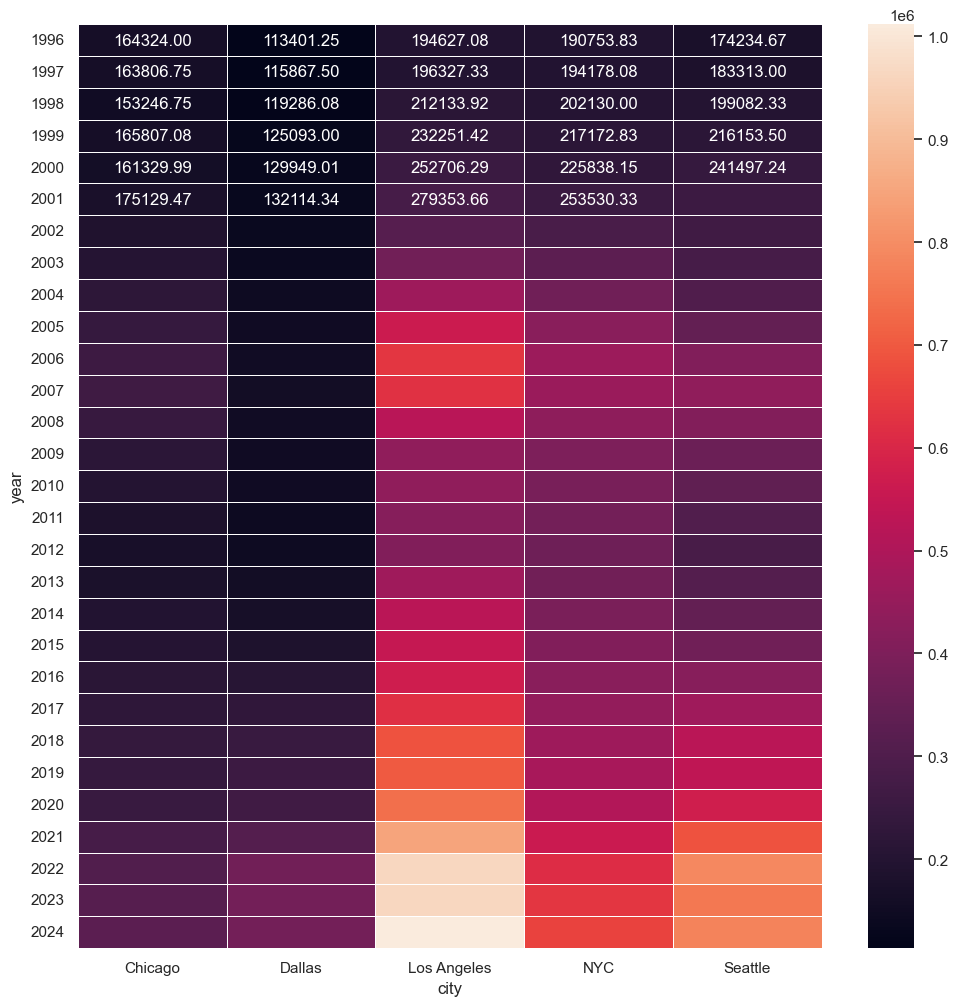

In [209]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
heatmap = (
    average_data
    .pivot(index="year", columns="city", values="value")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(heatmap, annot=True, fmt=".2f", linewidths=.5, ax=ax)